Setting up necessary things

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 32      #batchsize for GPU 32
version=0

In [2]:
!pip install -Uqq fastai

In [3]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import ImageClassifierCleaner

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd /content/drive/MyDrive/Art Style Recognizer

/content/drive/MyDrive/Art Style Recognizer


Fetch Data

In [6]:
dblock= DataBlock(
    blocks= (ImageBlock, CategoryBlock),
    get_items= get_image_files,                                 #get_image_files returns a list of all images in that path
    splitter= RandomSplitter(valid_pct=0.1, seed=42),           #getting 90-10 train validation split
    get_y= parent_label,                                        #taking the folder name as labels
    item_tfms= Resize(128)                                      #resize to get the image of same shape
)

In [7]:
data_path="data"
dblock=dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3), batch_tfms=aug_transforms())
dls=dblock.dataloaders(data_path, bs=bs)
torch.save(dls, f"data_loaders/artStyle_dataloader_v{version}.pk1")

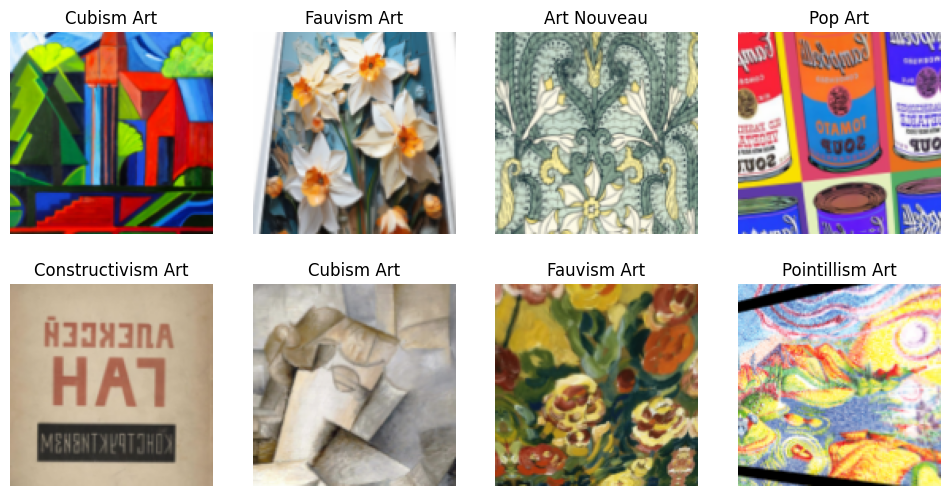

In [8]:
dls.train.show_batch(max_n=8, nrows=2)

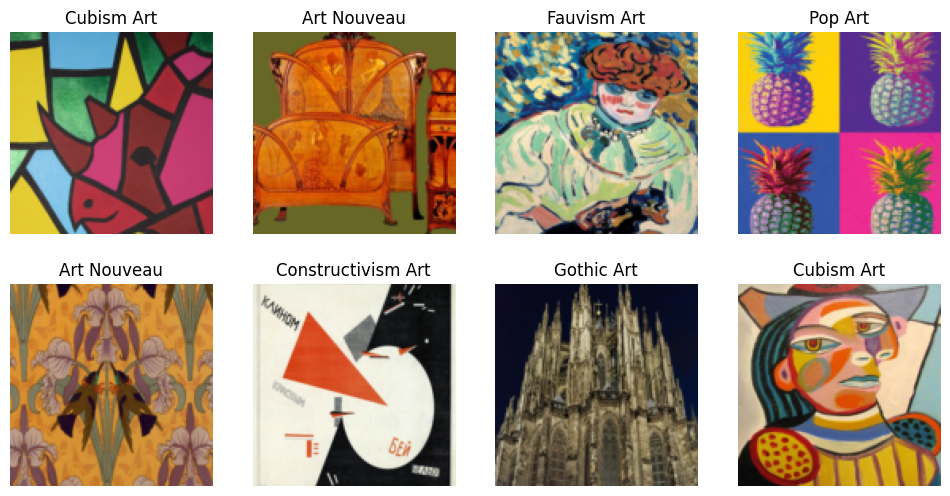

In [9]:
dls.valid.show_batch(max_n=8, nrows=2)

Model Training

In [10]:
model_path="models"

In [11]:
model=vision_learner(dls, resnet34, metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 82.9MB/s]


In [12]:
model.fine_tune(5)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes sh

In [13]:
version=1

In [14]:
model.save(f"artStyle_recognizer-v{version}")

Path('models/artStyle_recognizer-v1.pth')

In [15]:
model.load(f"artStyle_recognizer-v{version}")

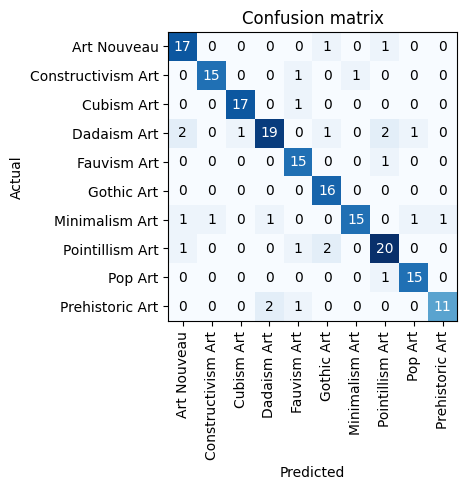

In [16]:
interp=ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

Fine Tuning

In [17]:
version = 5

In [18]:
torch.save(dls, f"artStyle_dataloader_v{version}.pk1")

In [19]:
dls = torch.load(f"artStyle_dataloader_v{version}.pk1")

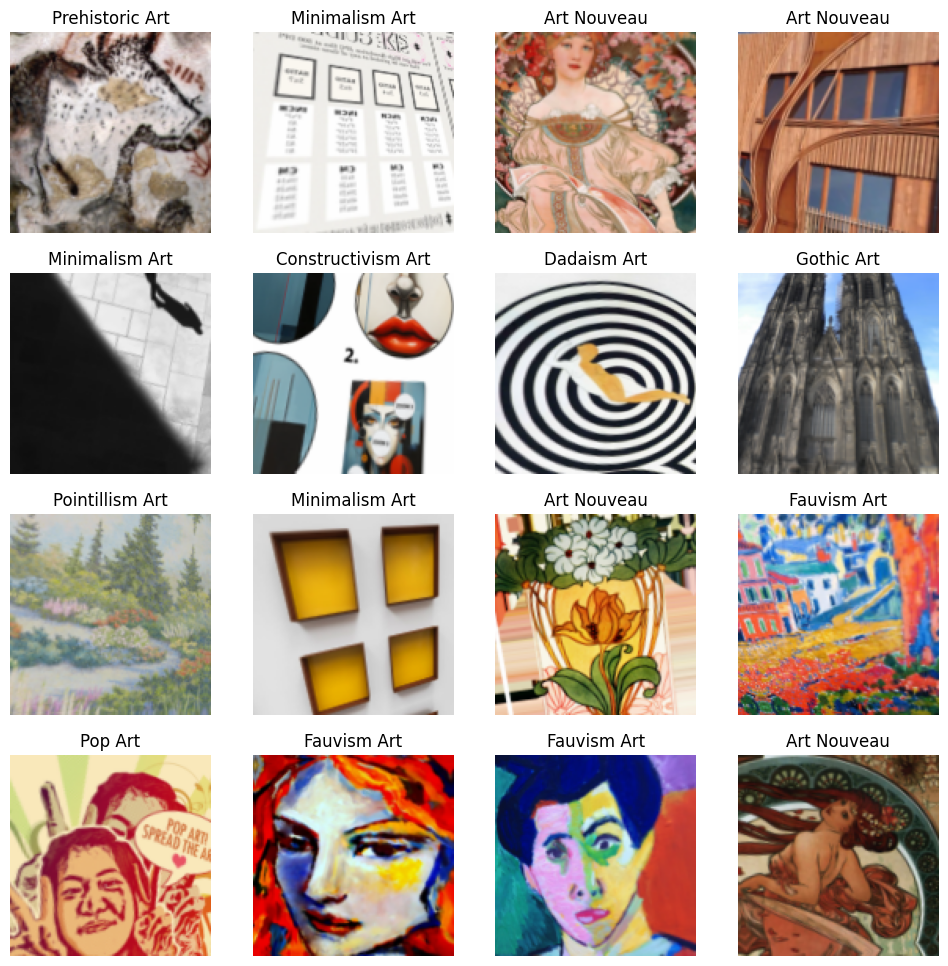

In [20]:
dls.train.show_batch(max_n=16, nrows=4)

In [21]:
model = vision_learner(dls, resnet34, metrics = [error_rate, accuracy])
model.save(f"artStyle_recognizer-v{version-1}")


Path('models/artStyle_recognizer-v4.pth')

In [22]:
model.load(f"artStyle_recognizer-v{version-1}")

In [23]:
model.fine_tune(5)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes sh

In [24]:
model.save(f"artStyle_recognizer-v{version}")

Path('models/artStyle_recognizer-v5.pth')

In [25]:
model.load(f"artStyle_recognizer-v{version}")

In [26]:
model.fine_tune(5)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes sh

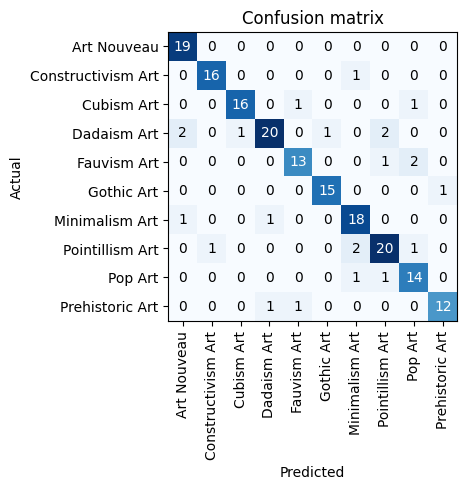

In [27]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

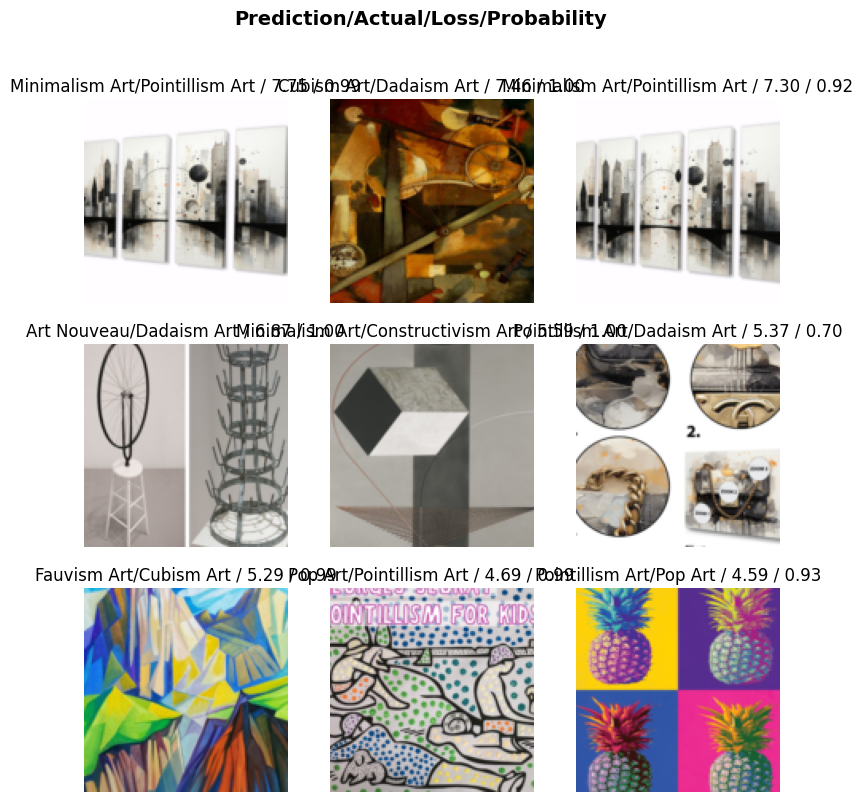

In [28]:
interp.plot_top_losses(9,nrows=3)

Data Cleaning

In [41]:
cleaner=ImageClassifierCleaner(model)
cleaner

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [39]:
cleaner.delete()

(#2) [2,3]

In [40]:
cleaner.change()

(#0) []

In [32]:
data_path = "data"

In [33]:
for idx in cleaner.delete():cleaner.fns[idx].unlink()                 #delete irrelevant file
for idx, cat in cleaner.change():shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}")       #change the directory

In [34]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))

In [35]:
dls = dblock.dataloaders(data_path,bs=bs)

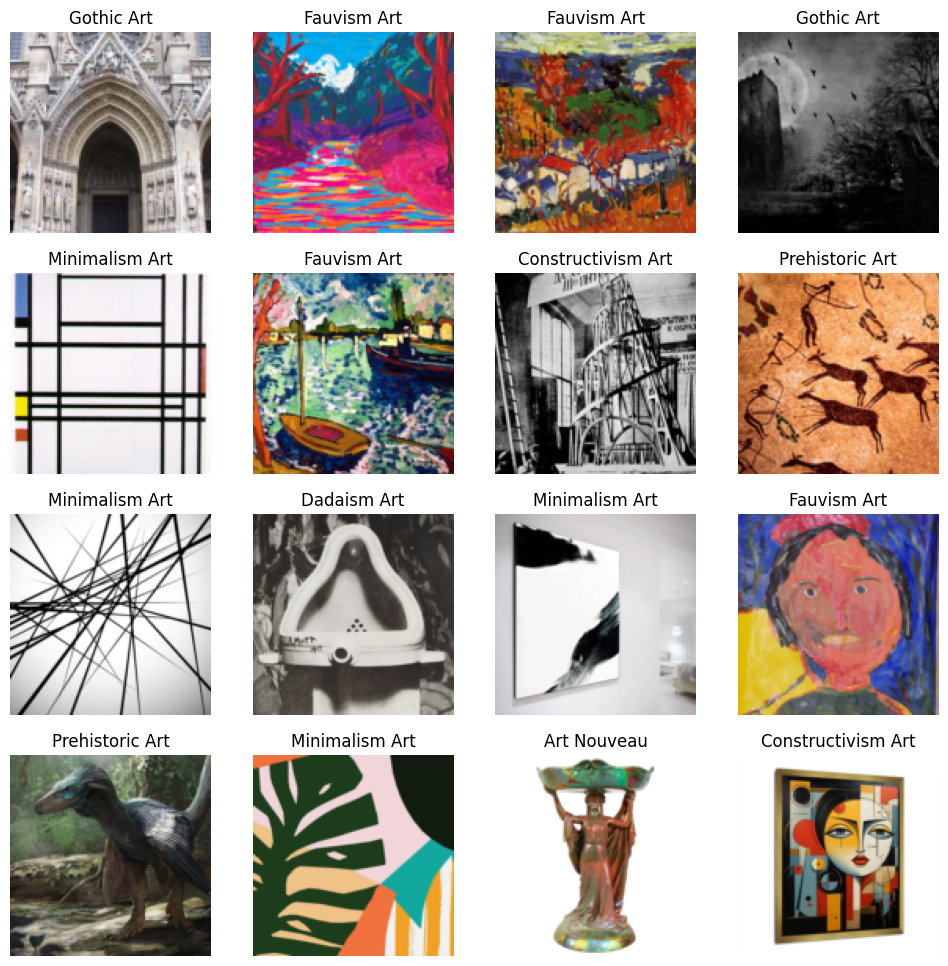

In [36]:
dls.train.show_batch(max_n=16, nrows=4)

In [37]:
torch.save(dls, f"data_loaders/artStyle_dataloader_v{version}.pkl")

Export model for inference

In [43]:
model.export(f"models/artStyle_recognizer-v{version}.pk1")